In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import librosa
import seaborn as sns

import os
import sys
import random


%matplotlib inline

IMAGEDIR = '../data/image_files/'
IMAGEDIR = '../data/resized_image_files/'
DATADIR = '../data/'

In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
tf.config.experimental.get_memory_info('GPU:0')

2024-09-06 16:31:30.214201: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-06 16:31:30.226123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-06 16:31:30.239730: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-06 16:31:30.243436: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-06 16:31:30.252725: I tensorflow/core/platform/cpu_feature_guar

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1725636691.202612   36680 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725636691.226848   36680 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725636691.226990   36680 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725636691.228448   36680 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

{'current': 0, 'peak': 0}

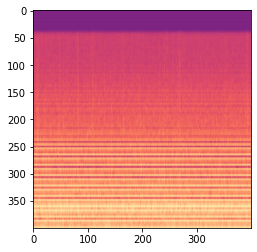

In [3]:
def plot_file(file):
    img = mpimg.imread(file)
    imgplot = plt.imshow(img)


images = os.listdir(IMAGEDIR)
plot_file(f"{IMAGEDIR}/{random.choice(images)}")
plt.show()

In [4]:
meta = pd.read_csv(f'{DATADIR}/flattened_data.csv')
meta

,Unnamed: 0.1,Unnamed: 0,device,hive number,date,hive temp,hive humidity,hive pressure,weather temp,weather humidity,...,lat,long,file name,queen presence,queen acceptance,frames,target,time,queen status,segments
0,0,0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,...,37.29,-121.95,2022-06-08--14-52-28_1__segment0,1,2,8,0,0.583,0,"[0, 1, 2, 3, 4, 5]"
1,0,0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,...,37.29,-121.95,2022-06-08--14-52-28_1__segment1,1,2,8,0,0.583,0,"[0, 1, 2, 3, 4, 5]"
2,0,0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,...,37.29,-121.95,2022-06-08--14-52-28_1__segment2,1,2,8,0,0.583,0,"[0, 1, 2, 3, 4, 5]"
3,0,0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,...,37.29,-121.95,2022-06-08--14-52-28_1__segment3,1,2,8,0,0.583,0,"[0, 1, 2, 3, 4, 5]"
4,0,0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,...,37.29,-121.95,2022-06-08--14-52-28_1__segment4,1,2,8,0,0.583,0,"[0, 1, 2, 3, 4, 5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,1274,1274,2,1,2022-07-15 15:28:21,31.55,27.90,1008.78,26.90,45,...,37.29,-121.95,2022-07-15--15-28-21_2__segment0,1,2,10,5,0.625,3,"[0, 1, 2, 3, 4]"
7096,1274,1274,2,1,2022-07-15 15:28:21,31.55,27.90,1008.78,26.90,45,...,37.29,-121.95,2022-07-15--15-28-21_2__segment1,1,2,10,5,0.625,3,"[0, 1, 2, 3, 4]"
7097,1274,1274,2,1,2022-07-15 15:28:21,31.55,27.90,1008.78,26.90,45,...,37.29,-121.95,2022-07-15--15-28-21_2__segment2,1,2,10,5,0.625,3,"[0, 1, 2, 3, 4]"
7098,1274,1274,2,1,2022-07-15 15:28:21,31.55,27.90,1008.78,26.90,45,...,37.29,-121.95,2022-07-15--15-28-21_2__segment3,1,2,10,5,0.625,3,"[0, 1, 2, 3, 4]"


,Unnamed: 0.1,Unnamed: 0,device,hive number,date,hive temp,hive humidity,hive pressure,weather temp,weather humidity,...,lat,long,file name,queen presence,queen acceptance,frames,target,time,queen status,segments
3123,522,522,1,4,2022-07-05 7:37:32,28.18,69.66,1008.8,18.75,80,...,37.29,-121.95,2022-07-05--07-37-32_1__segment0,1,2,8,3,0.292,3,"[0, 1, 2, 3, 4, 5]"


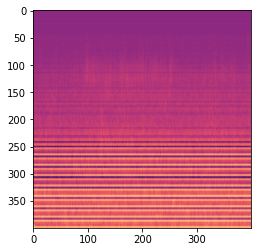

In [5]:
sample = meta.sample()
plot_file(f'{IMAGEDIR}/{sample.iloc[0]["file name"]}.png')
sample

In [6]:
meta.iloc[0]

Unnamed: 0.1                                       0
Unnamed: 0                                         0
device                                             1
hive number                                        5
date                             2022-06-08 14:52:28
hive temp                                      36.42
hive humidity                                  30.29
hive pressure                                1007.45
weather temp                                   26.68
weather humidity                                  52
weather pressure                                1013
wind speed                                      8.75
gust speed                                       NaN
weatherID                                        711
cloud coverage                                    75
rain                                               0
lat                                            37.29
long                                         -121.95
file name           2022-06-08--14-52-28_1__se

# Explanation of features

There are 23 features in this dataset. 

All weather variables are collected from the OpenWeatherAPI.

1. `Device`. There are 2 devices these samples were collected from
2. `Hive number`. There are X hives
3. `Date`. 
4. `Hive temp`.
5. `Hive humidity`.
6. `Hive pressure`.
7. `Weather temp`.
8. `Weather humidity`.
9. `Weather pressure`.
10. `Wind speed`.
11. `Gust speed`. (Missing some values).
12. `WeatherID`. Weather API code, taken from OpenWeatherMap.
13. `Cloud coverage`.
13. `Precipitation`.
14. `Lat`. This is always constant.
15. `Long`. This is always constant.
16. `Filename`. Name of the corresponding raw file. Used to build up to get sound segments files or (now, post-processed) Mel Spectrogram image files.
17. `Queen Presence`. `{0, not present; 1, present}`.
18. `Queen Acceptance`. `{0, No Queen present; 1, Not accepted; 2, Accepted}`.
19. `Frames`. Number of frames in the bee box. 8 or 9.
20. `Target`. Queen acceptance, Queen presence combined into one number. (IGNORE).
21. `Time`. Time of day value in range `[0, 1]`. 24 hours scaled to the range.
22. `Queen Status`. (BETTER than target).



### Queen Status
Combines queen presence and acceptance.
* 0 - Queen Right / Has original queen.
* 1 - Queen not present.
* 2 - Queen present and rejected.
* 3 - Queen present and newly accepted.

To confirm a queen was accepted or rejected, there was a daily hive inspection. Observed bees' reaction towards the queen in the cage.
* Are they attempting to sting or ball (i.e. suffocate) the introduced queen?
* If there are 2+ layers of bees around the cage, it is an indication that they are aggressive and hostile towards the queen.

In the 24-hour period that a queen's status changes from rejected to accepted (i.e. between hive inspections), there was ambiguity around the exact time that the queen became accepted.
* This data was discarded.

The term "queen right" and "queen accepted" is the same. However, these events are split up as the author thought it may affect the sound of the hive. Queen right is interpreted as the status of the hive before the author removed the queen.

More information on the weather units can be found: https://openweathermap.org/current




In [7]:
def pie_plot(col, ax):
    counts = np.bincount(meta[col].to_numpy())

    ax.set_title(col)
    ax.pie(counts / np.sum(counts), labels=[str(i) for i in range(len(counts))])

In [8]:
meta.describe()

,Unnamed: 0.1,Unnamed: 0,device,hive number,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,...,cloud coverage,rain,lat,long,queen presence,queen acceptance,frames,target,time,queen status
count,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7088.000000,7100.000000,7100.000000,...,7100.000000,7100.0,7088.00,7.088000e+03,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,616.372254,616.372254,1.559577,2.721408,28.963956,44.522020,1009.216652,20.283839,63.486761,1012.891831,...,28.362113,0.0,37.29,-1.219500e+02,0.866761,1.514789,9.119155,3.352535,0.481730,2.076197
std,366.480335,366.480335,0.496473,1.486709,8.171689,18.290667,2.415782,5.604246,16.052017,41.745374,...,33.946446,0.0,0.00,4.263557e-14,0.339857,0.718563,0.992946,1.613116,0.287026,1.101918
min,0.000000,0.000000,1.000000,1.000000,15.500000,7.230000,1003.540000,10.750000,0.000000,0.000000,...,0.000000,0.0,37.29,-1.219500e+02,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000
25%,296.000000,296.000000,1.000000,1.000000,22.380000,32.115000,1007.330000,15.440000,51.000000,1013.000000,...,0.000000,0.0,37.29,-1.219500e+02,1.000000,1.000000,8.000000,3.000000,0.250000,1.000000
50%,594.500000,594.500000,2.000000,3.000000,27.900000,41.770000,1009.290000,19.210000,66.000000,1015.000000,...,20.000000,0.0,37.29,-1.219500e+02,1.000000,2.000000,10.000000,3.000000,0.500000,3.000000
75%,940.000000,940.000000,2.000000,4.000000,33.060000,54.715000,1010.760000,24.750000,78.000000,1016.000000,...,40.000000,0.0,37.29,-1.219500e+02,1.000000,2.000000,10.000000,5.000000,0.750000,3.000000
max,1274.000000,1274.000000,2.000000,5.000000,55.620000,93.470000,1015.970000,35.430000,88.000000,1021.000000,...,100.000000,0.0,37.29,-1.219500e+02,1.000000,2.000000,10.000000,5.000000,0.958000,3.000000


In [9]:
meta["queen status"].unique()

array([0, 1, 2, 3])

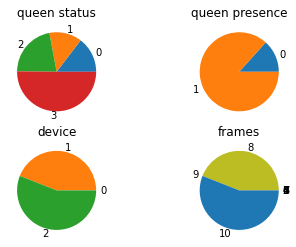

In [10]:
fig, axes = plt.subplot_mosaic("""
AB
CD
""")
axes


pie_plot("queen status", ax=axes["A"])
pie_plot("queen presence", ax=axes["B"])
pie_plot("device", ax=axes["C"])
pie_plot("frames", ax=axes["D"])

# Cleaning Dataset


In [11]:
from sklearn import preprocessing

feature_cols = [
    "device",
    "hive number",
    "hive temp",
    "hive humidity",
    "hive pressure",
    # "weather temp", HAS NA
    "weather humidity",
    "weather pressure",
    # "wind speed", HAS NA
    "cloud coverage",
    "frames",
]

cleaned_meta = meta[[
    # Required metadata
    "date",
    "file name",
    "queen status",

] + feature_cols]

N_FEATURES = len(feature_cols)
N_CATEGORIES = len(meta["queen status"].unique())

cleaned_meta.isna().any()

date                False
file name           False
queen status        False
device              False
hive number         False
hive temp           False
hive humidity       False
hive pressure       False
weather humidity    False
weather pressure    False
cloud coverage      False
frames              False
dtype: bool

In [12]:
# Fit and transform
scaler = preprocessing.StandardScaler()
scaler.fit(cleaned_meta[feature_cols].to_numpy())
cleaned_meta.loc[:, feature_cols] = scaler.transform(cleaned_meta[feature_cols])
print(f"Scaler:\nMEAN: {scaler.mean_},\nSCALE: {scaler.scale_}")
cleaned_meta.describe()

/home/sai/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_36680/2809274190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_meta.loc[:, feature_cols] = scaler.transform(cleaned_meta[feature_cols])


Scaler:
MEAN: [   1.55957746    2.72140845   28.96395634   44.52201972 1009.21665211
   63.48676056 1012.89183099   28.36211268    9.11915493],
SCALE: [ 0.49643784  1.48660431  8.17111393 18.28937901  2.41561187 16.05088631
 41.74243446 33.94405507  0.99287567]


,queen status,device,hive number,hive temp,hive humidity,hive pressure,weather humidity,weather pressure,cloud coverage,frames
count,7100.000000,7.100000e+03,7.100000e+03,7.100000e+03,7.100000e+03,7.100000e+03,7.100000e+03,7.100000e+03,7.100000e+03,7.100000e+03
mean,2.076197,2.561957e-16,1.280978e-16,-3.842935e-16,-2.882202e-16,-2.499509e-14,1.361040e-16,4.003058e-16,3.202446e-17,-9.607338e-16
std,1.101918,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,0.000000,-1.127185e+00,-1.157947e+00,-1.647750e+00,-2.038999e+00,-2.349985e+00,-3.955343e+00,-2.426528e+01,-8.355546e-01,-1.127185e+00
25%,1.000000,-1.127185e+00,-1.157947e+00,-8.057599e-01,-6.783729e-01,-7.810245e-01,-7.779484e-01,2.591344e-03,-8.355546e-01,-1.127185e+00
50%,3.000000,8.871655e-01,1.874013e-01,-1.302095e-01,-1.504709e-01,3.036410e-02,1.565795e-01,5.050422e-02,-2.463498e-01,8.871655e-01
75%,3.000000,8.871655e-01,8.600752e-01,5.012834e-01,5.573169e-01,6.389056e-01,9.042017e-01,7.446066e-02,3.428550e-01,8.871655e-01
max,3.000000,8.871655e-01,1.532749e+00,3.262229e+00,2.676306e+00,2.795709e+00,1.527220e+00,1.942428e-01,2.110469e+00,8.871655e-01


# Splitting Train-Val-Test

Here, I am using 10% for testing. The rest will randomly be split between train and validation 50-50.

In [13]:
from sklearn.model_selection import train_test_split

train_and_val, test = train_test_split(cleaned_meta, test_size=0.1, shuffle=True)
train, val = train_test_split(train_and_val, test_size=0.5, shuffle=True )

print(f"Train size: {len(train)} | Val size: {len(val)} | Test size: {len(test)} | Total size: {len(meta)}")

Train size: 3195 | Val size: 3195 | Test size: 710 | Total size: 7100


In [14]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models, activations, Input

print("GPUs Enabled:", tf.config.list_physical_devices('GPU'))

GPUs Enabled: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Data Analysis

I want to do some rudimentary data analysis of the variables we have kept.

    
TODO

<AxesSubplot:xlabel='date'>

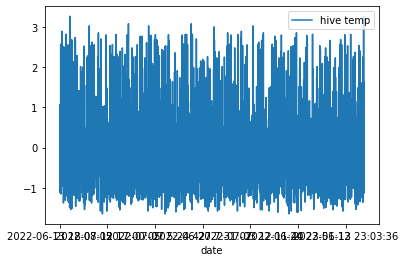

In [15]:
df = train

df.plot.line(x="date", y="hive temp")

# Building Models

Building a model, which takes 2 inputs: `[image, features]`. The image will be passed through a CNN architecture that is hot-swappable. Then, it will be concatenated with the feature tensor that is passed through a densely connected layer. Finally the output layer will be a classification layer.

## SimpleCNN

This is a simple CNN architecture made up of only Batch Normalisation (BN), CNNs and Max Pool layers.

In [16]:
from typing import List, Tuple
def simpleCNN(input_shape: Tuple, config: List[Tuple[int, int, int, int]], name: str="0"):
    """
    Create a simple cnn architecture that is easily configuration with the config parameter.

    input_shape: Tuple
    config: List[Tuple[int, int, int, int]] -> 
        List of (n_filters, filter_size, n_max_pool_size, n_max_pool_stride), where
        n_filters: int -> Number of filters for this CNN layer.
        filter_size: int -> n, to use an n x n filter on this CNN layer. 
        n_max_pool_size: int -> n, to use an n x n max pool after the CNN layer.
        n_max_pool_stride: int -> Stride length of the max pool kernel. If given as 0,
                                  this is taken as n_max_pool_size.
        The number of CNN + Max Pool blocks are the same as len(config).
    name: str
    """
    input_layer = Input(shape=input_shape)
    conv_layers = []
    for n_filters, filter_size, n_max_pool_size, n_max_pool_stride in config:
        if n_max_pool_stride == 0: 
            n_max_pool_stride = n_max_pool_size
        # Create 1 BN, 1 CNN and 1 Max pooling layer
        conv_layers.extend([
            layers.BatchNormalization(),
            layers.Conv2D(n_filters, (filter_size, filter_size), activation=activations.relu),
            layers.MaxPool2D(pool_size=(n_max_pool_size, n_max_pool_size), strides=n_max_pool_stride)
        ])
    output_layer = input_layer
    for layer in conv_layers:
        output_layer = layer(output_layer)
    return models.Model(inputs=input_layer, outputs=output_layer, name=f"simpleCNN_{name}")

## DenseNet
DenseNet contains Dense Blocks where each layer $l$ has the previous $l-1$ layers' feature maps as inputs. It does this by concatenating these values.

### Notable Features
- DenseNet : $H_l()$ = BN-ReLU-Conv(1x1)-BN-ReLU-Conv(3x3)

#### Composite Function
DenseNet proposes the following dense connectivity pattern, given the layer's composite functions,
$$
x_l = H_l([x_0, x_1, ..., x_{l-1}])
$$

#### Transition Layers
Typically, in CNN architectures, we have pooling layers. This typically changes the sizes of feature-maps (through down-sampling). As we use the concatenation operation, it is not viable if the feature map size changes. To still faciliate this down-sampling, we have transitional layers between dense blocks, where the feature maps are consistent through the dense block, but down-sample in the transition layers.

The layers have:
- Batch Normalisation
- 1 x 1 Convolution
- 2 x 2 Average Pooling, with stride size 2

#### Growth Rate
As each layer has access to all previous layer feature maps (within the same Dense Block), the feature-maps can be said to be a global state of the network. The global state, once written, can be accessed from anywhere in the network - there is no need to replicate it from layer to layer.

We can use a small $k$, as shown in the paper, and still achieve a good result. The author uses $k=12$ as an example.

Growth rate $k$: If each function $H_l$ produces $k$ feature maps, the $l^{th}$ layer has $k_0 + k \times (l - 1)$ input feature maps with $k_0$ is the number of channels in the input layers.

#### Bottlenecks
Each layer produces $k$ output feature maps, it will have many more inputs. The author lists 2 papers, where you can introduce a $1x1$ bottleneck layer before each $3x3$ convolution to reduce the number of input feature-maps - which will improve computational efficiency.

TODO: Research this computation efficiency. 

Each 1x1 convolution produces $4k$ feature-maps.

#### Compression
To improve model compactness, it is possible to reduce the number of feature-maps at transition layers. 
Let a dense block contain $m$ feature maps, we can scale this value to let the following transition layer generate $\theta m$ output feature maps, for $0 < \theta \le 1$. This is referred to as the compression factor.

For $\theta = 1$, the number of feature-maps across transition layers remains the same.
- The paper sets $\theta = 0.5$.


### Notes on the tensorflow implementation
`tf.keras.applications.DenseNetXXX` exists. After reviewing the implementation code, this looks correct. However, the growth-rate $k$ is unconfigurable. As well as this, it is hard to trim the DenseNet to only contain dense and transition blocks.

In [17]:
def conv_blocks(x, growth_rate: int, name: str, epsilon: float=1.001e-5):
    """
    Pretty much the same as the conv_blocks in keras.applications.densenet
    """
    bn_axis = 3 if tf.keras.backend.image_data_format() == "channels_last" else 1

    # Bottleneck, with 4*growth_rate feature maps.
    new_x = layers.BatchNormalization(axis=bn_axis, epsilon=epsilon, name=f"{name}_1x1_bn")(x)
    new_x = layers.Activation("relu", name=f"{name}_1x1_relu")(new_x)
    new_x = layers.Conv2D(4*growth_rate, 1, use_bias=False, name=f"{name}_1x1_conv")(new_x)

    # 3x3 conv, with growth_rate output feature maps.
    new_x = layers.BatchNormalization(axis=bn_axis, epsilon=epsilon, name=f"{name}_3x3_bn")(x)
    new_x = layers.Activation("relu", name=f"{name}_3x3_relu")(new_x)
    new_x = layers.Conv2D(growth_rate, 3, padding="same", use_bias=False, name=f"{name}_3x3_conv")(new_x)
    
    # Allows the dense connections through concatenation.
    x = layers.Concatenate(axis=bn_axis, name=f"{name}_concat")([x, new_x])
    return x

def dense_block(x, n_blocks: int, name: str, growth_rate: int=32):
    """
    Pretty much the same as the dense_blocks in keras.applications.densenet 
    """
    for i in range(n_blocks):
        x = conv_blocks(x, growth_rate=growth_rate, name=f"{name}_block{i+1}")
    return x

def transition_block(x, reduction: float, name: str, epsilon: float=1.001e-5):
    """
    Pretty much the same as transition_block in keras.application.densenet
    """
    bn_axis = 3 if tf.keras.backend.image_data_format() == "channels_last" else 1
    
    # Includes compression
    x = layers.BatchNormalization(axis=bn_axis, epsilon=epsilon, name=f"{name}_1x1_bn")(x)
    x = layers.Activation("relu", name=f"{name}_1x1_relu")(x)
    x = layers.Conv2D(int(x.shape[bn_axis] * reduction), 1, use_bias=False, name=f"{name}_1x1_conv")(x)
    x = layers.AveragePooling2D(2, strides=2, name=f"{name}_average_pool")(x)
    return x

def denseNetCNN(input_shape: Tuple, config: List[int], growth_rate: int=32, name: str="0"):
    """
    Trimmed DenseNet architecture, with provided denseblocks with transitional layers in between.
    This does not have the initial convolution or the final classification layer from the original paper.
    
    input_shape: Tuple
    growth_rate: int -> The growth rate for the dense net model, as defined in the original paper.
    config: List[int]: n repetitions per dense block.
    """
    input_layer = Input(shape=input_shape)
    x = input_layer
    for i in range(len(config) - 1):
        x = dense_block(x, config[i], growth_rate=growth_rate, name=f"conv{i}")
        x = transition_block(x, 0.5, name=f"pool{i}")
    x = dense_block(x, config[-1], name="conv_last")
    return models.Model(inputs=input_layer, outputs=x, name=f"denseNetCNN_{name}")

In [18]:
def model(image_input_shape: Tuple, n_features: int, n_categories: int, cnn, **kwargs):
    """
    Create the final model, given a selected cnn model architecture.

    input_shape: Tuple
    n_features: int -> Number of features that are not part of the image.
    n_categories: int -> Number of output categories, for classification.
    n_cnn_output: int -> Output shape of the cnn_architecture.
    cnn: function -> When called, builds the model. Returns models.Model.
    """
    # CNN Model
    image_input_layer = layers.Input(shape=image_input_shape)
    cnn_layer = cnn()(image_input_layer)
    flatten_layer = layers.Flatten()(cnn_layer)
    cnn_model = models.Model(inputs=image_input_layer, outputs=flatten_layer, name="CNN_arch")
    
    # Feature Model
    feature_input_layer = Input(shape=(n_features,))
    batch_norm_layer = layers.BatchNormalization()(feature_input_layer)
    dense_layer = layers.Dense(n_features, activation=activations.relu)(batch_norm_layer)
    feature_model = models.Model(inputs=feature_input_layer, outputs=dense_layer, name="feature_model")

    combined_layer = layers.concatenate([cnn_model.output, feature_model.output])
    dropout_layer = layers.Dropout(0.5)(combined_layer)
    classification_layer = layers.Dense(n_categories, activation=activations.softmax)(dropout_layer)
    return models.Model(inputs=[cnn_model.input, feature_model.input], outputs=classification_layer, name="model")

def model_only_images(image_input_shape: Tuple, n_categories: int, cnn, **kwargs):
    """
    Create the final model, given a selected cnn model architecture. Only accept image inputs.
    
    See model() for more information.
    """
    image_input_layer = layers.Input(shape=image_input_shape)
    cnn_layer = cnn()(image_input_layer)
    flatten_layer = layers.Flatten()(cnn_layer)
    dropout_layer = layers.Dropout(0.1)(flatten_layer)
    output_layer = layers.Dense(n_categories, activation=activations.softmax)(dropout_layer)
    return models.Model(inputs=image_input_layer, outputs=output_layer, name="model_only_images")

### Testing Model with Example Inputs

1. Simple CNN Model
2. General overarching model, with the separate inputs

In [19]:
# Load image, drop alpha column.
images = os.listdir(IMAGEDIR)
example_image_path = f"{IMAGEDIR}/{random.choice(images)}"
example_image = mpimg.imread(example_image_path)[:,:,:3]
example_image = example_image[np.newaxis, ...]

# Load example features.
features = train.iloc[0][~train.columns.isin(["date", "queen status", "file name"])].to_numpy()[np.newaxis, ...]

In [20]:
# Testing CNN on random image
input_shape = (400, 400, 3)
config = [(16, 3, 2, 0), (16, 3, 2, 0)]  # Test config
exampleSimpleCNN = lambda: simpleCNN(input_shape, config)

dense_config = [16, 12, 24, 16] # 121 configuration
exampleDenseNet = lambda: denseNetCNN(input_shape, dense_config)

exampleSimpleModel = model(input_shape, n_features=N_FEATURES, n_categories=N_CATEGORIES,
                     cnn=exampleSimpleCNN)
outSimple = exampleSimpleModel([example_image, features]).numpy()

exampleDenseModel = model(input_shape, n_features=N_FEATURES, n_categories=N_CATEGORIES,
                     cnn=exampleDenseNet)
outDense = exampleSimpleModel([example_image, features]).numpy()

print(outSimple)
print(outDense)

2024-09-06 16:31:32.343825: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
W0000 00:00:1725636692.391618   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636692.404848   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636692.406181   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636692.407503   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636692.408675   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636692.410703   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636692.411490   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636692.487064   36680 gpu_t

[[0.24986117 0.28812572 0.2578827  0.20413037]]
[[0.24986117 0.28812572 0.2578827  0.20413037]]


In [21]:
exampleSimpleModel.summary()
exampleDenseModel.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 400, 400,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simpleCNN_0         │ (None, 98, 98,    │      2,844 │ input_layer[0][0] │
│ (Functional)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 9)         │         36 │ input_layer_2[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 153664)    │          0 │ simpleCNN_0[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 9)         │         90 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 153673)    │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 153673)    │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │    614,696 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 617,666 (2.36 MB)

 Trainable params: 617,610 (2.36 MB)

 Non-trainable params: 56 (224.00 B)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 400, 400,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ denseNetCNN_0       │ (None, 50, 50,    │ 12,075,203 │ input_layer_3[0]… │
│ (Functional)        │ 1056)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 9)         │         36 │ input_layer_5[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 2640000)   │          0 │ denseNetCNN_0[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 9)         │         90 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 2640009)   │          0 │ flatten_1[0][0],  │
│ (Concatenate)       │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 2640009)   │          0 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │ 10,560,040 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,635,369 (86.35 MB)

 Trainable params: 22,554,583 (86.04 MB)

 Non-trainable params: 80,786 (315.57 KB)

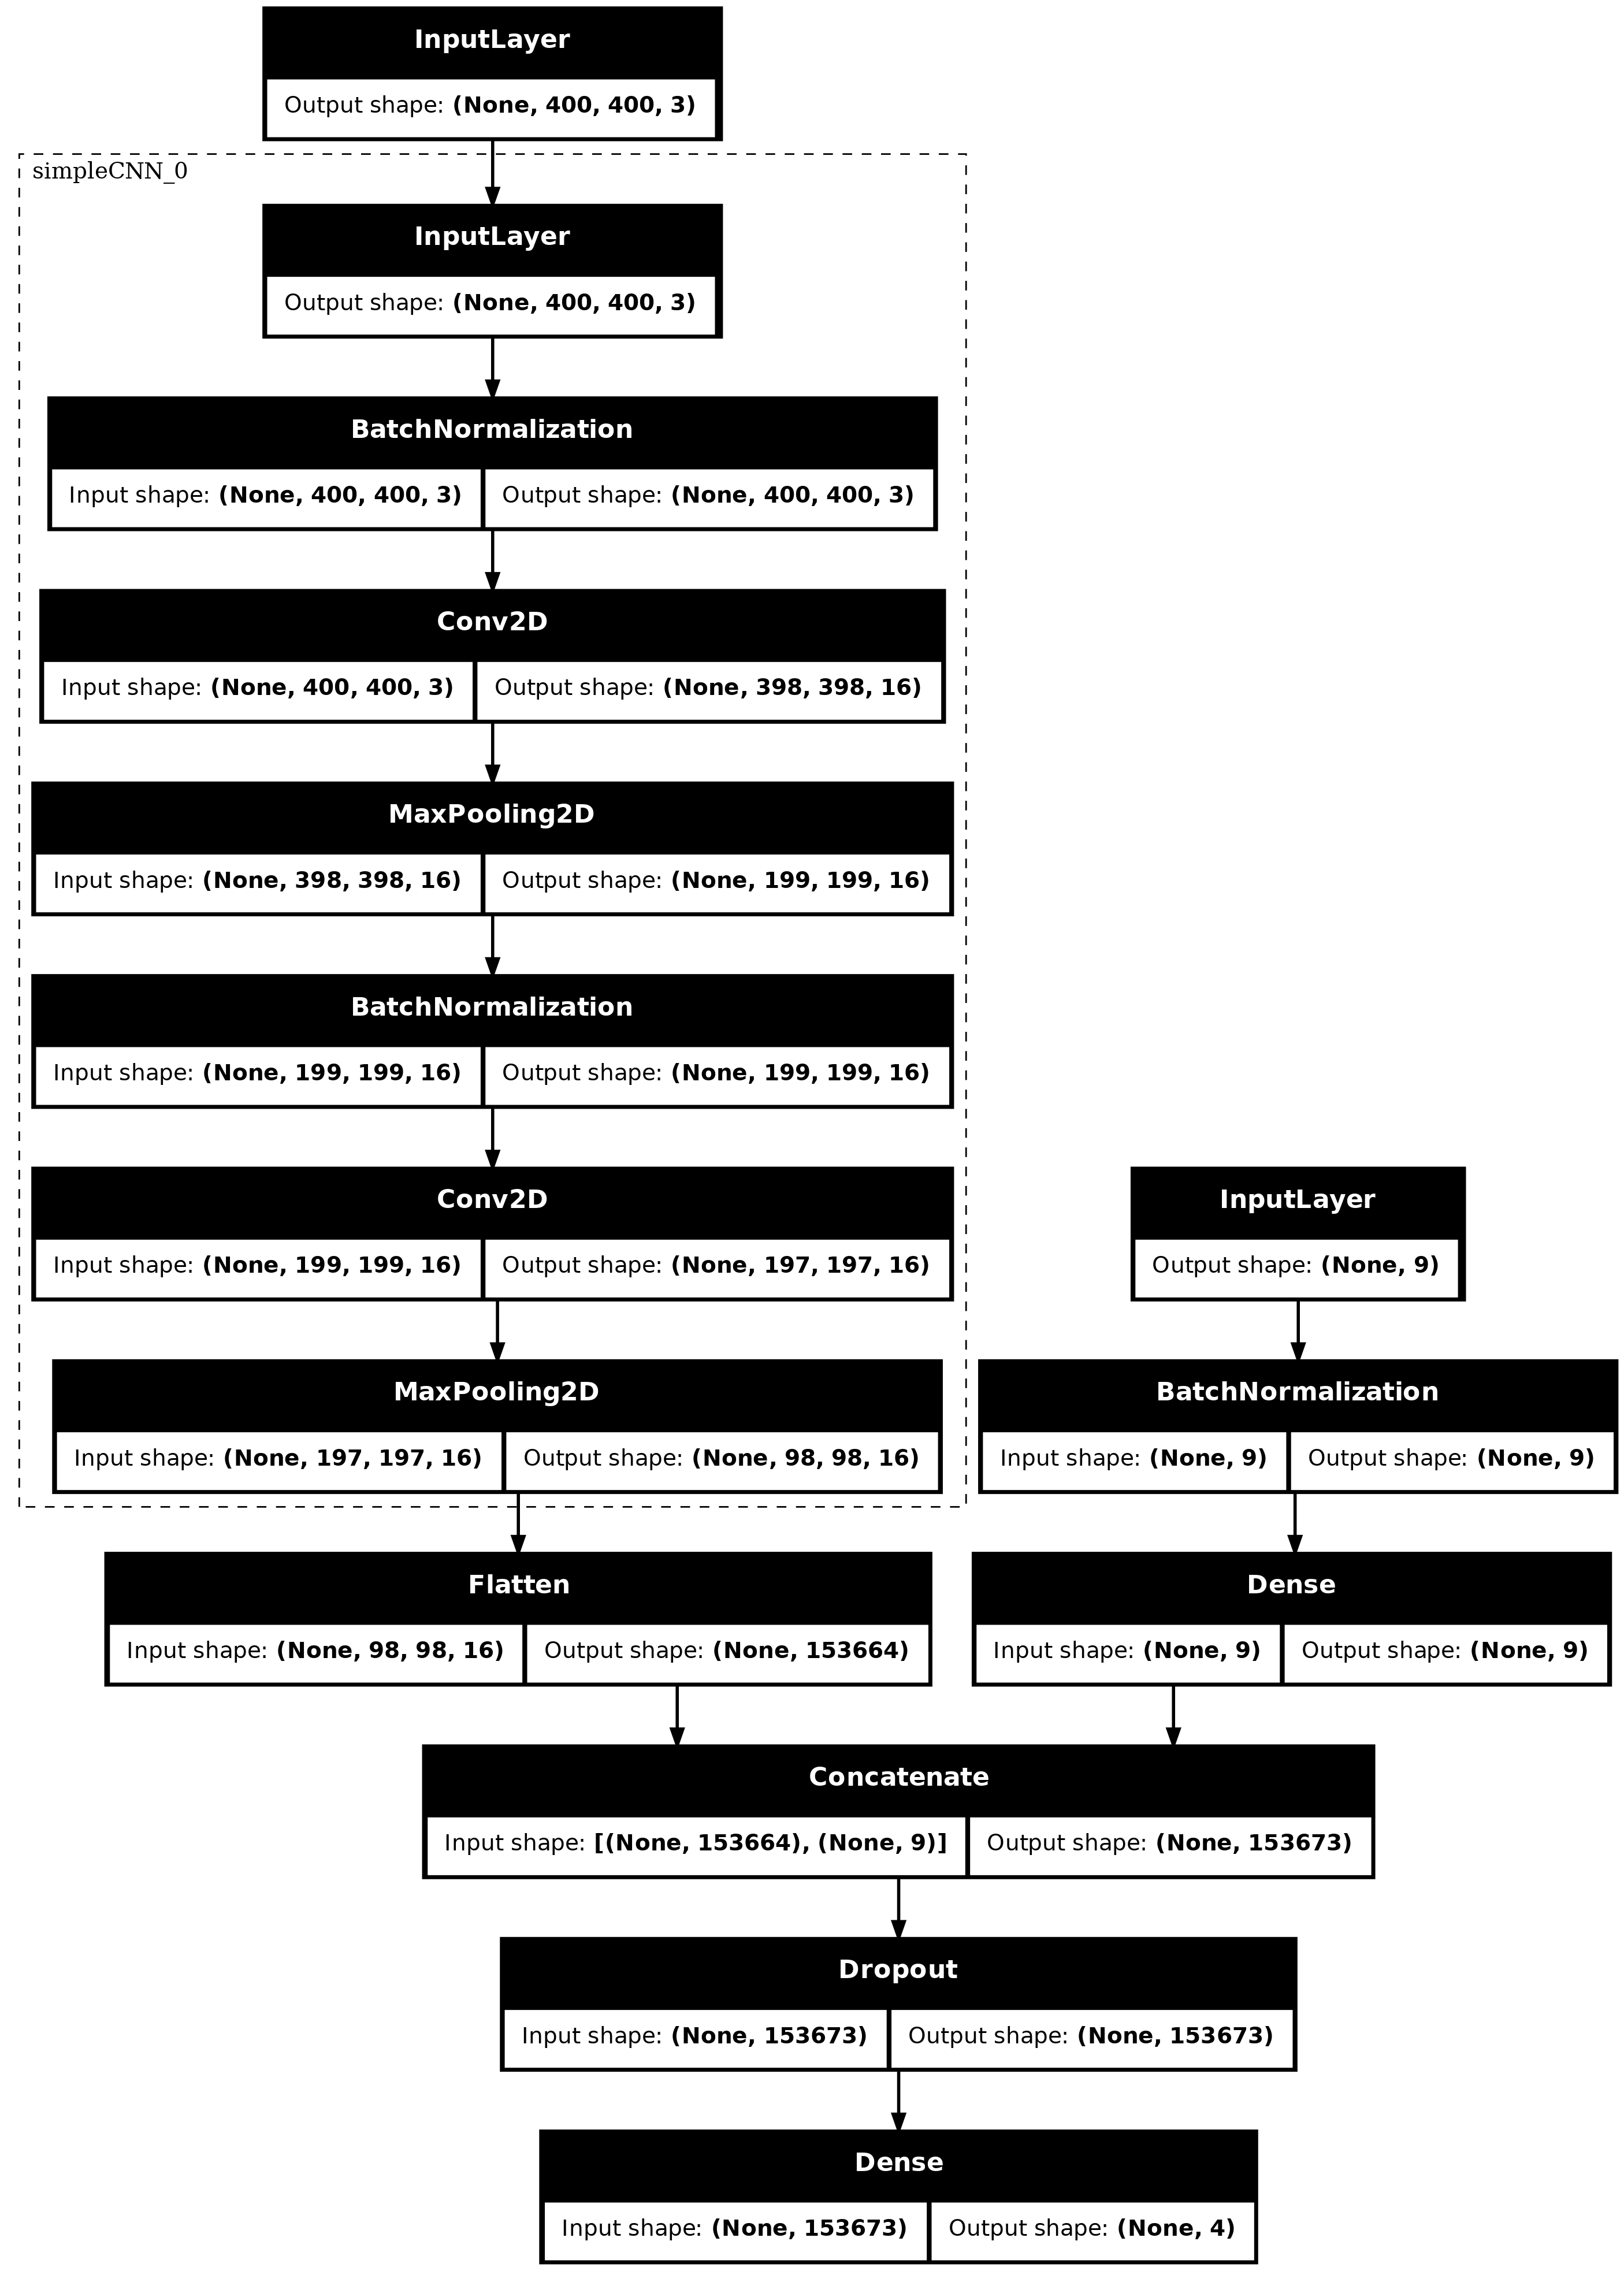

In [22]:
tf.keras.utils.plot_model(exampleSimpleModel, to_file="example_simple_model.png", expand_nested=True, show_shapes=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.339213 to fit



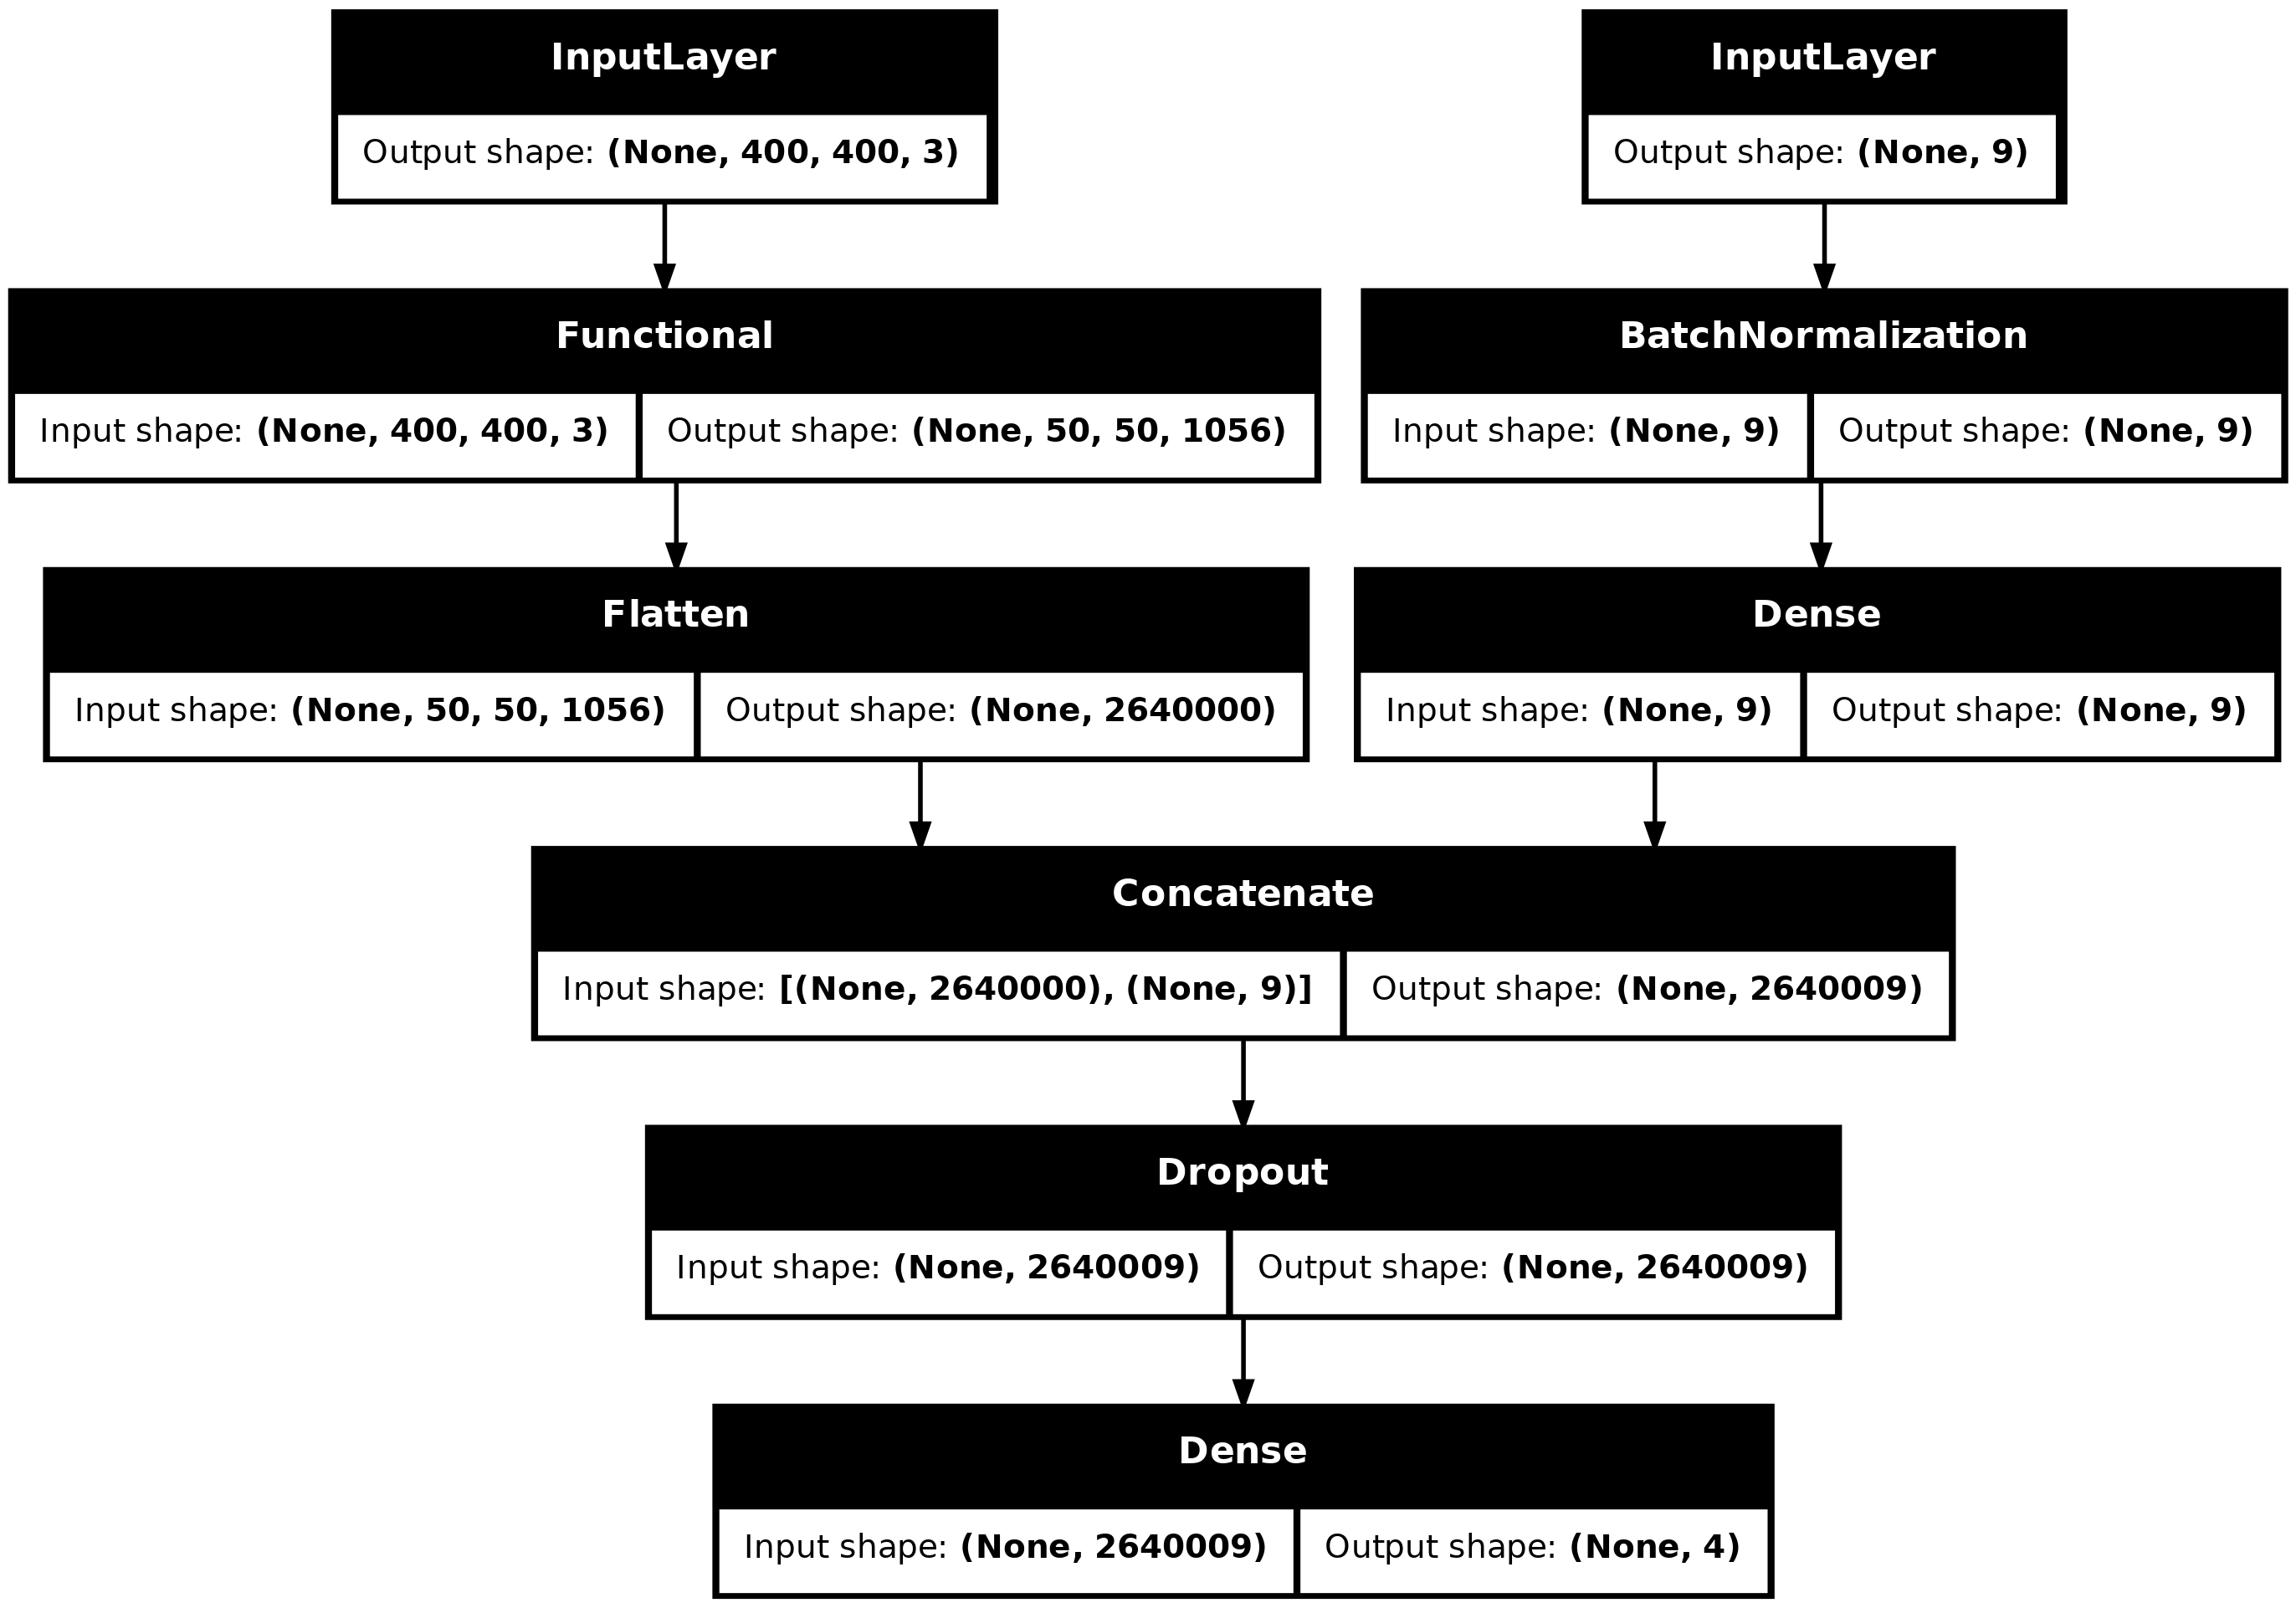

In [23]:
_ = tf.keras.utils.plot_model(exampleDenseModel, to_file="example_dense_model.png", expand_nested=True, show_shapes=True)
tf.keras.utils.plot_model(exampleDenseModel, expand_nested=False, show_shapes=True)

# Preprocessing

I created a custom data generator, which yields each batch of images + features.

In [24]:
IMAGECLASS_DIR = "../data/classes"
class DataGen(tf.keras.utils.PyDataset):
    def __init__(self, df,
                 y_col = 'queen status',
                 batch_size = 32, 
                 image_only = False,
                 **kwargs):
        super().__init__(**kwargs)

        self.df = df.copy()
        self.batch_size = batch_size
        self.n = len(self.df)
        self.y_col = y_col
        self.image_only = image_only

        self.num_classes = len(pd.unique(self.df[self.y_col]))
        self.bad_columns = ["date", "queen status", "file name"]
        self.good_columns = [i for i in self.df.columns if i not in self.bad_columns]

    def load_image(self, file_name, queen_status):
        file_name = f"{IMAGECLASS_DIR}/class_{queen_status}/{file_name}.png"
        raw = tf.io.read_file(file_name)
        tensor = tf.io.decode_image(raw, channels=3)
        # Normalise
        tensor = tf.cast(tensor, tf.float32) / 255.0
        return tensor

    def __getitem__(self, index):
        # Find the batch. Capped at length of batch
        low = index * self.batch_size
        high = min(low + self.batch_size, len(self.df))
        
        batch = self.df.iloc[low:high]

        # Load images
        images = np.array([self.load_image(i["file name"], i["queen status"]) for _, i in batch.iterrows()])
        # Load features
        if not self.image_only:
            features = batch[self.good_columns].to_numpy()
        # Load output
        output = tf.keras.utils.to_categorical(batch[self.y_col].to_numpy(), num_classes=self.num_classes)
        
        if not self.image_only:
            return (images, features), output
        return images, output
        

    def __len__(self):
        return self.n // self.batch_size
        
for x, y in DataGen(meta, batch_size=128):
    print(x[0].shape, x[1].shape, y.shape)
    break

(128, 400, 400, 3) (128, 23) (128, 4)


In [25]:
BATCH_SIZE = 32
train_dataset = DataGen(train, batch_size=BATCH_SIZE)
val_dataset = DataGen(val, batch_size=BATCH_SIZE)
test_dataset = DataGen(test, batch_size=BATCH_SIZE)
train_and_val_dataset = DataGen(train_and_val, batch_size=BATCH_SIZE)

train_image_only_dataset = DataGen(train, image_only=True, batch_size=BATCH_SIZE)
val_image_only_dataset = DataGen(val, image_only=True, batch_size=BATCH_SIZE)
test_image_only_dataset = DataGen(test, image_only=True, batch_size=BATCH_SIZE)
train_and_val_image_only_dataset = DataGen(train_and_val, image_only=True, batch_size=BATCH_SIZE)

for x, y in train_dataset:
    print(x[0].shape, type(x[0]))
    print(x[1].shape, type(x[1]))
    print(y.shape, type(y))
    
    cce = tf.keras.losses.CategoricalCrossentropy()
    print(cce(y, exampleSimpleModel(x)).numpy())
    break

(32, 400, 400, 3) <class 'numpy.ndarray'>
(32, 9) <class 'numpy.ndarray'>
(32, 4) <class 'numpy.ndarray'>


W0000 00:00:1725636696.507841   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636696.510218   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636696.512697   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636696.515189   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636696.518712   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636696.522529   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636696.526307   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636696.538531   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636696.548074   36680 gp

1.4308136


W0000 00:00:1725636697.141310   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636697.153924   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636697.162824   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636697.166887   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725636697.173557   36680 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced


In [26]:
image_dataset = tf.keras.utils.image_dataset_from_directory(
    "../data/classes/",
    labels='inferred',
    label_mode='categorical',
    image_size=(400,400),
)

for x, y in image_dataset:
    print(x.shape, y.shape)
    break

Found 7100 files belonging to 4 classes.
(32, 400, 400, 3) (32, 4)


# Training

So far, I:
- Split dataset into train + test
- Created data generators
- Implemented the models


I still have to:
- Train models
- Hyper-parameter optimise the models.


The hyper-parameters I want to optimise:
1. Simple CNN model:
    - $n_{layers}$ -> Number of layers
    - $n_{filterMaps}$ -> Number of filter maps
2. DenseNet: 
    - The different DenseNet configurations proposed in the original paper
    - $k$ -> Growth Rate

## Hyper-parameter Optimization
To perform hyper-parameter optimisation, I will use Keras Tuner.

In [27]:
IMAGE_INPUT_SHAPE = (400, 400, 3)

def image_only_cnn(cnn_model, image_input_shape=IMAGE_INPUT_SHAPE, n_categories=N_CATEGORIES, name="0"):
    cnn_model.name = f"image_only_{cnn_model.name}"

    # Wrap the CNN architecture layer with a classification layer
    input_layer = Input(shape=image_input_shape)
    cnn_layer = cnn_model(input_layer)
    flatten_layer = layers.Flatten()(cnn_layer)
    dropout_layer = layers.Dropout(0.1)(flatten_layer)
    output_layer = layers.Dense(n_categories, activation=activations.softmax)(dropout_layer)
    return models.Model(inputs=input_layer, outputs=output_layer)
            

def model_builder(model_type: str,
                  n_layers=4, n_filter_maps=16,
                  growth_rate=32,
                  dense_net_type=0,
                  final_model_image_only=False,
                  learning_rate=1e-3,
                  image_input_shape=IMAGE_INPUT_SHAPE,
                  n_features=N_FEATURES,
                  n_categories=N_CATEGORIES):
    """
    Builds the 2 types of models created above
    """
    match model_type:
        case "simple":
            config = [
                (n_filter_maps, 3, 2, 0)
                for i in range(n_layers)
            ]
            cnn_model = simpleCNN(image_input_shape, config=config, name=f"simple_cnn_model_{n_layers}_layers_{n_filter_maps}_fms")
        case "densenet":
            match dense_net_type:
                case 0:
                    config = (6, 12, 24, 16)
                case 1:
                    config = (6, 12, 32, 32)
                case 2:
                    config = (6, 12, 48, 32)
                case 3:
                    config = (6, 12, 64, 48)
            cnn_model = denseNetCNN(input_shape=image_input_shape, growth_rate=growth_rate,
                                    config=config, name=f"densenet_cnn_model_{growth_rate}_growth_rate")
    
    if final_model_image_only:
        final_model = image_only_cnn(cnn_model)
    else:
        final_model = model(image_input_shape, n_features=n_features, n_categories=n_categories, cnn=lambda: cnn_model)
        
    final_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[
            'accuracy'
        ],
    )
    return final_model

In [28]:
import keras_tuner as kt

def model_tuner(hp, image_only: bool):
    hp_n_layers = hp.Int('n_layers', 2, 4)
    hp_n_filter_maps = hp.Int('n_filter_maps', 16, 32, step=8)
    hp_learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    hp_image_only = hp.Boolean('image_only')
    model =  model_builder('simple', 
                           n_layers=hp_n_layers,
                           n_filter_maps=hp_n_filter_maps,
                           learning_rate=hp_learning_rate,
                           final_model_image_only=image_only)
    return model

image_only_tuner = kt.Hyperband(lambda hp: model_tuner(hp, True),
                                objective='val_accuracy',
                                max_epochs=20,
                                factor=3,
                                directory='',
                                project_name='image_only')


all_feature_tuner = kt.Hyperband(lambda hp: model_tuner(hp, False),
                                 objective='val_accuracy',
                                 max_epochs=20,
                                 factor=3,
                                 directory='',
                                 project_name='all_features')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Reloading Tuner from ./image_only/tuner0.json
Reloading Tuner from ./all_features/tuner0.json


So far, I have created two tuners. I want to compare two types of models and how they perform, if the input data is "image_only" vs. adding the auxilliary metadata.

In [29]:
image_only_tuner.search(train_image_only_dataset, 
             validation_data=val_image_only_dataset,
             epochs=20, callbacks=[stop_early])

all_feature_tuner.search(train_dataset, 
                         validation_data=val_dataset,
                         epochs=20, callbacks=[stop_early])

In [30]:
print("All Feature Best: ", all_feature_tuner.get_best_hyperparameters()[0].values)
print("Image only Best: ", image_only_tuner.get_best_hyperparameters()[0].values)

All Feature Best:  {'n_layers': 3, 'n_filter_maps': 24, 'learning_rate': 0.001, 'image_only': False, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0015'}
Image only Best:  {'n_layers': 4, 'n_filter_maps': 32, 'learning_rate': 0.001, 'image_only': False, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


## Training
Taking the best performing models, based on 20 epochs of training. I am going to further train them before testing.

In [31]:
ALL_FEATURES_SIMPLE_WEIGHTS = 'all_features_simple_final.weights.h5'
IMAGE_ONLY_SIMPLE_WEIGHTS = 'image_only_simple_final.weights.h5'

def fit_or_load_best_model(tuner, dataset, filename, epochs=10, plot_hist=False):
    if os.path.exists(filename):
        print(f"Loaded previously saved weights [{filename}]")
        tuner.get_best_models()[0].load_weights(filename)
        return tuner.get_best_models()[0]
    else:
        print(f"Training best model [{filename}]")
        all_feature_history = tuner.get_best_models()[0].fit(dataset, epochs=epochs)
        if plot_hist:
            plt.plot(all_feature_history.history['loss'])
        tuner.get_best_models()[0].save_weights(filename)
        return tuner.get_best_models()[0]


all_features_simple_model = fit_or_load_best_model(all_feature_tuner, train_and_val_dataset, ALL_FEATURES_SIMPLE_WEIGHTS, epochs=15)
image_only_simple_model = fit_or_load_best_model(image_only_tuner, train_and_val_image_only_dataset, IMAGE_ONLY_SIMPLE_WEIGHTS, epochs=15)

Loaded previously saved weights [all_features_simple_final.weights.h5]


/home/sai/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Loaded previously saved weights [image_only_simple_final.weights.h5]


In [32]:
all_features_train_and_val_evaluation = all_features_simple_model.evaluate(train_and_val_dataset)
image_only_train_and_val_evaluation = image_only_simple_model.evaluate(train_and_val_image_only_dataset)

print(f"All Features Training: Loss: {all_features_train_and_val_evaluation[0]}, Accuracy: {all_features_train_and_val_evaluation[1]}")
print(f"Image only Training: Loss: {image_only_train_and_val_evaluation[0]}, Accuracy: {image_only_train_and_val_evaluation[1]}")

I0000 00:00:1725636700.325473   36764 service.cc:146] XLA service 0x7f9e30003c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725636700.325492   36764 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-09-06 16:31:40.335248: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


  1/199 ━━━━━━━━━━━━━━━━━━━━ 6:53 2s/step - accuracy: 0.9062 - loss: 0.1822

2024-09-06 16:31:41.955366: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
I0000 00:00:1725636702.049827   36764 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


199/199 ━━━━━━━━━━━━━━━━━━━━ 29s 135ms/step - accuracy: 0.8607 - loss: 0.3999
199/199 ━━━━━━━━━━━━━━━━━━━━ 29s 137ms/step - accuracy: 0.8047 - loss: 0.5723
All Features Training: Loss: 0.40011873841285706, Accuracy: 0.8610238432884216
Image only Training: Loss: 0.5668995380401611, Accuracy: 0.809202253818512


In [33]:
import matplotlib.gridspec as gridspec

# Kernels are (3 x 3) x RGB x n_kernels
# Bias is n_kernels x 1
# Only choose one channel in RGB to visualise
def plot_conv_layers(conv_layers, channel=0, size=(5, 5)):
    fig = plt.figure(figsize=(20, 7))
    outer = gridspec.GridSpec(1, len(conv_layers), wspace=0.2, hspace=0.2)
    for ilayer, layer in enumerate(conv_layers):
        inner = gridspec.GridSpecFromSubplotSpec(*size, subplot_spec=outer[ilayer],
                                                 wspace=0.1, hspace=0.1)
        kernels, bias = layer.get_weights()
        kernels = kernels[:, :, channel, :]
        for i in range(kernels.shape[-1]):
            ax = plt.Subplot(fig, inner[i // size[1], i % size[1]])
            sns.heatmap(kernels[:,:,i], ax=ax, cmap="crest")
            fig.add_subplot(ax)
    plt.show()

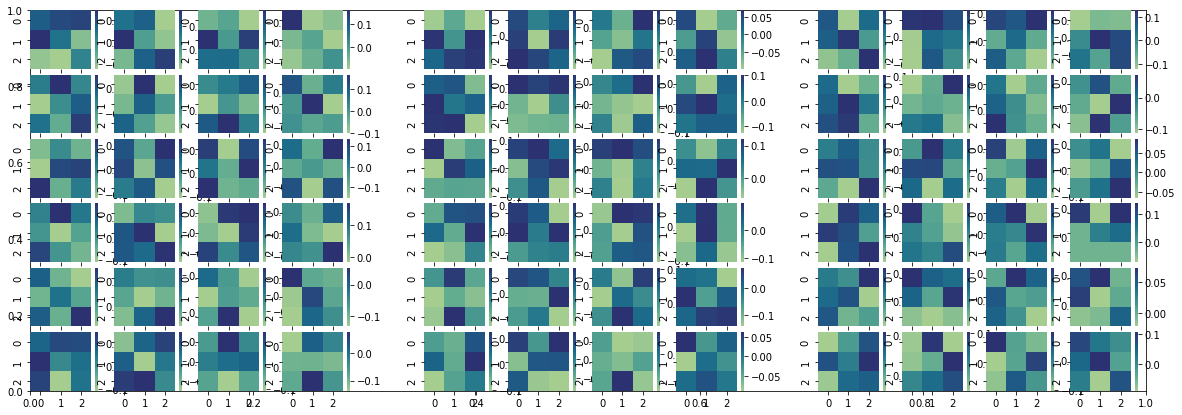

In [34]:
plot_conv_layers(
    [i for i in all_features_simple_model.layers[2].layers if "conv" in i.name],
    size=(6,4)
)

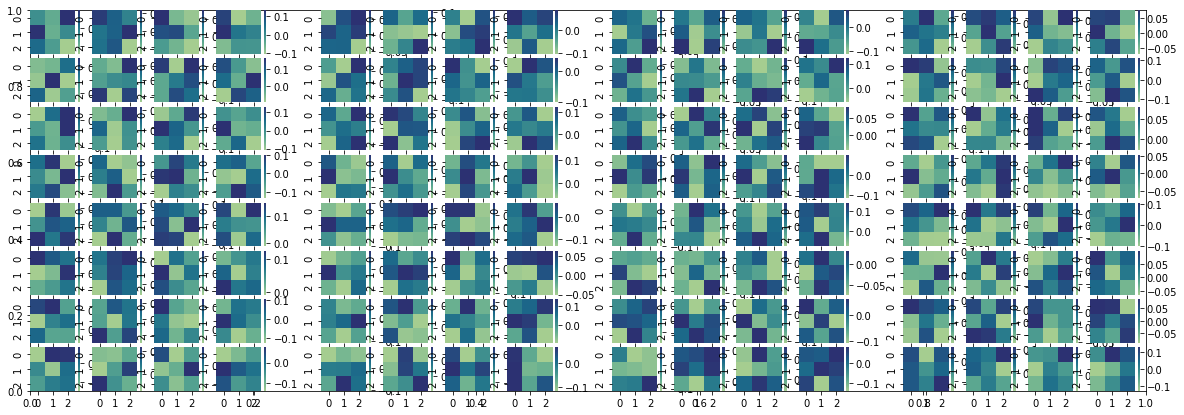

In [35]:
plot_conv_layers(
    [i for i in image_only_simple_model.layers[1].layers if "conv" in i.name],
    size=(8, 4)
)

# Testing

Finally, the model evaluation. I evaluate both models on the testing (out of sample) dataset.

In [37]:
all_features_test_evaluation = all_features_simple_model.evaluate(test_dataset)
image_only_test_evaluation = image_only_simple_model.evaluate(test_image_only_dataset)

print(f"All Features Testing: Loss: {all_features_test_evaluation[0]}, Accuracy: {all_features_test_evaluation[1]}")
print(f"Image only Testing: Loss: {image_only_test_evaluation[0]}, Accuracy: {image_only_test_evaluation[1]}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.8610 - loss: 0.4060
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.8098 - loss: 0.6026
All Features Testing: Loss: 0.3718436062335968, Accuracy: 0.8693181872367859
Image only Testing: Loss: 0.530907928943634, Accuracy: 0.8252840638160706
